In [71]:
%matplotlib widget 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
#import scikit_learn as sklearn

In [72]:
import agent_based_model

SyntaxError: invalid syntax (agent_based_model.py, line 646)

In [ ]:
txns = pd.read_csv('./txns_list.csv')
txns['time'] = txns.timestep_to_time.apply(pd.to_datetime)
txns.dtypes

timestep                     int64
timestep_to_time            object
sender_id                    int64
receiver_id                  int64
sender_type                 object
amount                     float64
time                datetime64[ns]
dtype: object

In [ ]:
txns.timestep

0       38
1       54
2       47
3       65
4       67
        ..
1900    78
1901    90
1902    91
1903    92
1904    95
Name: timestep, Length: 1905, dtype: int64

# define X

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = txns.time.to_numpy().reshape(-1,1)
X = txns.timestep.to_numpy().reshape(-1,1)
X.shape

(1905, 1)

In [ ]:
Xdeg2 = np.hstack((X, X**2))

(array([ 13.,   0.,   6., 119., 444., 668., 420., 135.,  56.,  44.]),
 array([ 1. , 10.5, 20. , 29.5, 39. , 48.5, 58. , 67.5, 77. , 86.5, 96. ]),
 <BarContainer object of 10 artists>)

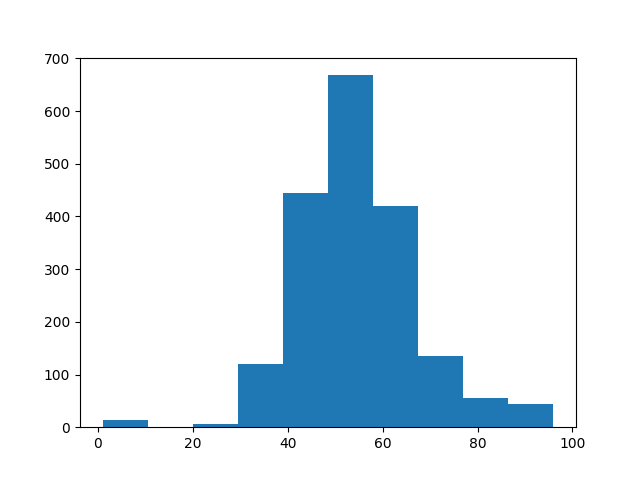

In [ ]:
plt.hist(X)

In [ ]:
X.shape

(1905, 1)

In [ ]:
txns.timestep

0       38
1       54
2       47
3       65
4       67
        ..
1900    78
1901    90
1902    91
1903    92
1904    95
Name: timestep, Length: 1905, dtype: int64

In [ ]:
txns.iloc[:15]

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time
0,38,2022-10-31 09:30:00,1,176,normal,-5275.417643,2022-10-31 09:30:00
1,54,2022-10-31 13:30:00,1,86,normal,-5130.963272,2022-10-31 13:30:00
2,47,2022-10-31 11:45:00,2,688,normal,-7029.970881,2022-10-31 11:45:00
3,65,2022-10-31 16:15:00,3,633,normal,-2633.337917,2022-10-31 16:15:00
4,67,2022-10-31 16:45:00,3,262,normal,-4937.723183,2022-10-31 16:45:00
5,45,2022-10-31 11:15:00,4,433,normal,-4978.168977,2022-10-31 11:15:00
6,52,2022-10-31 13:00:00,5,714,normal,-3587.142081,2022-10-31 13:00:00
7,55,2022-10-31 13:45:00,6,952,normal,-4163.608325,2022-10-31 13:45:00
8,58,2022-10-31 14:30:00,6,462,normal,-3216.368973,2022-10-31 14:30:00
9,44,2022-10-31 11:00:00,7,686,normal,-6541.260312,2022-10-31 11:00:00


In [ ]:
print('mean time', txns[txns.sender_type=='normal'].time.mean())
print('mean time', txns[txns.sender_type=='suspicious'].time.mean())
txns.sender_type.value_counts()

mean time 2022-10-31 13:18:36.879511552
mean time 2022-10-31 18:38:39.230769408


normal        1801
suspicious     104
Name: sender_type, dtype: int64

In [ ]:
txns.dtypes

timestep                     int64
timestep_to_time            object
sender_id                    int64
receiver_id                  int64
sender_type                 object
amount                     float64
time                datetime64[ns]
dtype: object

In [ ]:
txns
# TODO: one class SVM

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time
0,38,2022-10-31 09:30:00,1,176,normal,-5275.417643,2022-10-31 09:30:00
1,54,2022-10-31 13:30:00,1,86,normal,-5130.963272,2022-10-31 13:30:00
2,47,2022-10-31 11:45:00,2,688,normal,-7029.970881,2022-10-31 11:45:00
3,65,2022-10-31 16:15:00,3,633,normal,-2633.337917,2022-10-31 16:15:00
4,67,2022-10-31 16:45:00,3,262,normal,-4937.723183,2022-10-31 16:45:00
...,...,...,...,...,...,...,...
1900,78,2022-10-31 19:30:00,1010,854,suspicious,-768.147863,2022-10-31 19:30:00
1901,90,2022-10-31 22:30:00,1010,1001,suspicious,-1000.582847,2022-10-31 22:30:00
1902,91,2022-10-31 22:45:00,1010,17,suspicious,-854.625186,2022-10-31 22:45:00
1903,92,2022-10-31 23:00:00,1010,1003,suspicious,-934.641919,2022-10-31 23:00:00


## kmeans

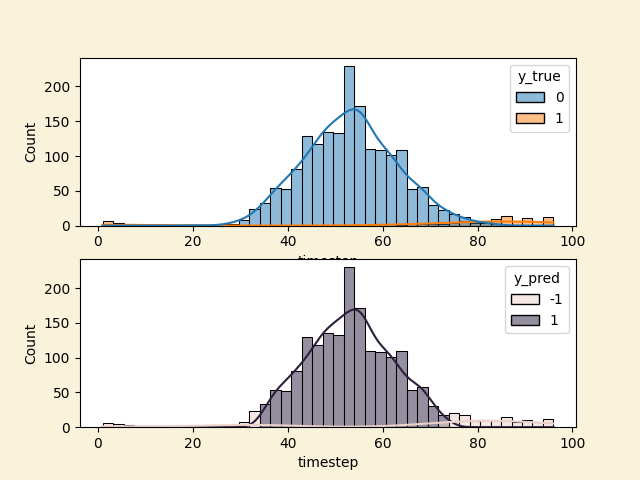

In [ ]:
fig, axes = plt.subplots(2,1)
sns.histplot(data=txns, x='timestep', kde=True, hue='y_true', ax=axes[0])
sns.histplot(data=txns, x='timestep', kde=True, hue='y_pred')
fig.patch.set_facecolor('#F9F3DC')
plt.show()

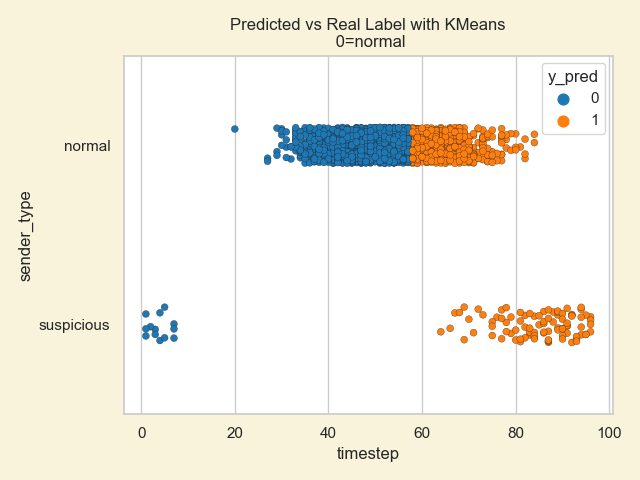

In [ ]:
y_pred = KMeans(
        n_clusters=2
    ).fit_predict(X)

txns['y_pred'] = y_pred
colors = ['r' if label==0 else 'b' for label in y_pred]
fig, ax = plt.subplots()
np.random.seed(123)
sns.reset_defaults()
#sns.set_theme(palette='viridis')
sns.set_context('notebook')
#sns.set_context('talk')
sns.set_style('whitegrid')
#sns.set(rc={'axes.facecolor':'palegoldenrod', 'figure.facecolor':'white'})
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', edgecolor='k', linewidth=.2)#, palette='')
fig.patch.set_facecolor('#F9F3DC')
#sns.violinplot(data=txns, x='timestep', y='sender_type', saturation=0.5)#, palette='')
#sns.kdeplot(data=txns, x='timestep',)
#sns.swarmplot(data=txns, x='timestep', y='sender_type', hue='y_pred')#, palette='')
#sns.boxplot(data=txns, x='timestep', y='sender_type', saturation=0.4)
plt.title('Predicted vs Real Label with KMeans\n 0=normal')
#sns.stripplot(X.flatten())
plt.tight_layout()
#clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
plt.show()

## Gaussian Mixture

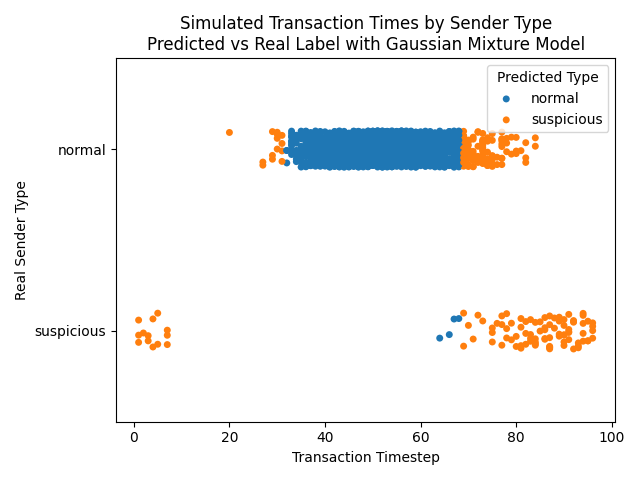

In [ ]:
from sklearn import mixture
y_pred = KMeans(
        n_clusters=2
    ).fit_predict(X)


fig, ax = plt.subplots()
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
y_pred = clf.fit_predict(X)

txns['y_pred'] = y_pred
np.random.seed(123)
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )
plt.title('Simulated Transaction Times by Sender Type\nPredicted vs Real Label with Gaussian Mixture Model')
plt.ylabel('Real Sender Type')
plt.xlabel('Transaction Timestep')
plt.legend(title='Predicted Type', labels=['normal','suspicious'])
plt.tight_layout()
plt.show()

In [ ]:
print(txns.y_pred.value_counts())
print(txns.y_true.value_counts())

0    1676
1     229
Name: y_pred, dtype: int64


AttributeError: 'DataFrame' object has no attribute 'y_true'

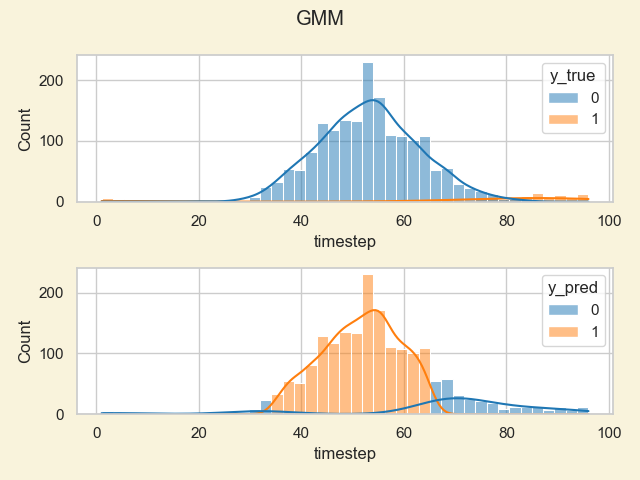

In [ ]:
fig, axes = plt.subplots(2,1)
plt.suptitle('GMM')
sns.histplot(data=txns, x='timestep', kde=True, hue='y_true', ax=axes[0])
sns.histplot(data=txns, x='timestep', kde=True, hue='y_pred')
fig.patch.set_facecolor('#F9F3DC')
plt.tight_layout()
plt.show()

In [ ]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,38,2022-10-31 09:30:00,1,176,normal,-5275.417643,2022-10-31 09:30:00,1,0
1,54,2022-10-31 13:30:00,1,86,normal,-5130.963272,2022-10-31 13:30:00,1,0
2,47,2022-10-31 11:45:00,2,688,normal,-7029.970881,2022-10-31 11:45:00,1,0
3,65,2022-10-31 16:15:00,3,633,normal,-2633.337917,2022-10-31 16:15:00,1,0
4,67,2022-10-31 16:45:00,3,262,normal,-4937.723183,2022-10-31 16:45:00,0,0
...,...,...,...,...,...,...,...,...,...
1900,78,2022-10-31 19:30:00,1010,854,suspicious,-768.147863,2022-10-31 19:30:00,0,1
1901,90,2022-10-31 22:30:00,1010,1001,suspicious,-1000.582847,2022-10-31 22:30:00,0,1
1902,91,2022-10-31 22:45:00,1010,17,suspicious,-854.625186,2022-10-31 22:45:00,0,1
1903,92,2022-10-31 23:00:00,1010,1003,suspicious,-934.641919,2022-10-31 23:00:00,0,1


In [ ]:
# group by node id? and then add in and out degrees? and number of tranasactions / transaction times? 
# each transaction time could be a feature... but how to do it... one hot encoding?
# or just... mean timestep and stddev?


 

In [ ]:
#txns['y_true'] = [0 if txn.sender_type=='normal' else 1 for txn in txns]
txns['y_true'] = txns.sender_type.apply(lambda x: 1 if x=='suspicious' else 0)
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,38,2022-10-31 09:30:00,1,176,normal,-5275.417643,2022-10-31 09:30:00,0,0
1,54,2022-10-31 13:30:00,1,86,normal,-5130.963272,2022-10-31 13:30:00,0,0
2,47,2022-10-31 11:45:00,2,688,normal,-7029.970881,2022-10-31 11:45:00,0,0
3,65,2022-10-31 16:15:00,3,633,normal,-2633.337917,2022-10-31 16:15:00,0,0
4,67,2022-10-31 16:45:00,3,262,normal,-4937.723183,2022-10-31 16:45:00,0,0
...,...,...,...,...,...,...,...,...,...
1900,78,2022-10-31 19:30:00,1010,854,suspicious,-768.147863,2022-10-31 19:30:00,1,1
1901,90,2022-10-31 22:30:00,1010,1001,suspicious,-1000.582847,2022-10-31 22:30:00,1,1
1902,91,2022-10-31 22:45:00,1010,17,suspicious,-854.625186,2022-10-31 22:45:00,1,1
1903,92,2022-10-31 23:00:00,1010,1003,suspicious,-934.641919,2022-10-31 23:00:00,1,1


## confusion matrix

[[1672  129]
 [   4  100]]
accuracy:  0.9301837270341208
mcc:  0.6216782014531091
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1801
           1       0.44      0.96      0.60       104

    accuracy                           0.93      1905
   macro avg       0.72      0.94      0.78      1905
weighted avg       0.97      0.93      0.94      1905



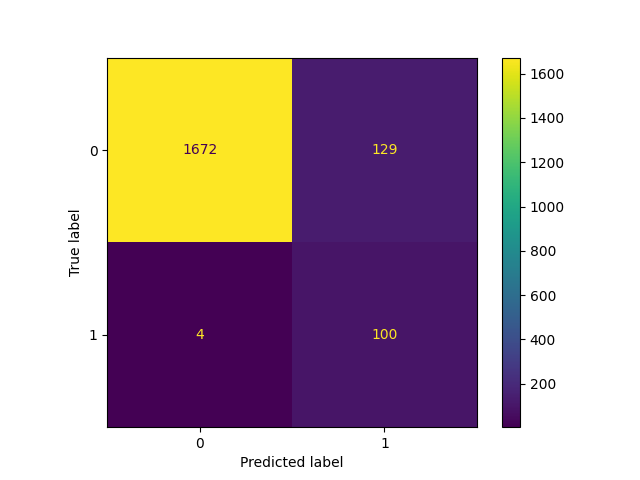

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score 
from sklearn.metrics import matthews_corrcoef 
c_matrix = confusion_matrix(txns.y_true, txns.y_pred)
print(c_matrix)
print('accuracy: ', accuracy_score(txns.y_true, txns.y_pred))
print('mcc: ', matthews_corrcoef(txns.y_true, txns.y_pred))
print(classification_report(txns.y_true, txns.y_pred))
ConfusionMatrixDisplay(c_matrix).plot()


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,38,2022-10-31 09:30:00,1,176,normal,-5275.417643,2022-10-31 09:30:00,0,0
1,54,2022-10-31 13:30:00,1,86,normal,-5130.963272,2022-10-31 13:30:00,0,0
2,47,2022-10-31 11:45:00,2,688,normal,-7029.970881,2022-10-31 11:45:00,0,0
3,65,2022-10-31 16:15:00,3,633,normal,-2633.337917,2022-10-31 16:15:00,0,0
4,67,2022-10-31 16:45:00,3,262,normal,-4937.723183,2022-10-31 16:45:00,0,0
...,...,...,...,...,...,...,...,...,...
1900,78,2022-10-31 19:30:00,1010,854,suspicious,-768.147863,2022-10-31 19:30:00,1,1
1901,90,2022-10-31 22:30:00,1010,1001,suspicious,-1000.582847,2022-10-31 22:30:00,1,1
1902,91,2022-10-31 22:45:00,1010,17,suspicious,-854.625186,2022-10-31 22:45:00,1,1
1903,92,2022-10-31 23:00:00,1010,1003,suspicious,-934.641919,2022-10-31 23:00:00,1,1


## isolation forest

In [ ]:
print(txns.y_true.value_counts())
#print(txns.y_pred.value_counts())
(txns.y_pred!=1).value_counts()

0    1801
1     104
Name: y_true, dtype: int64


True     1676
False     229
Name: y_pred, dtype: int64

In [ ]:
Xdeg2.shape

(1905, 2)

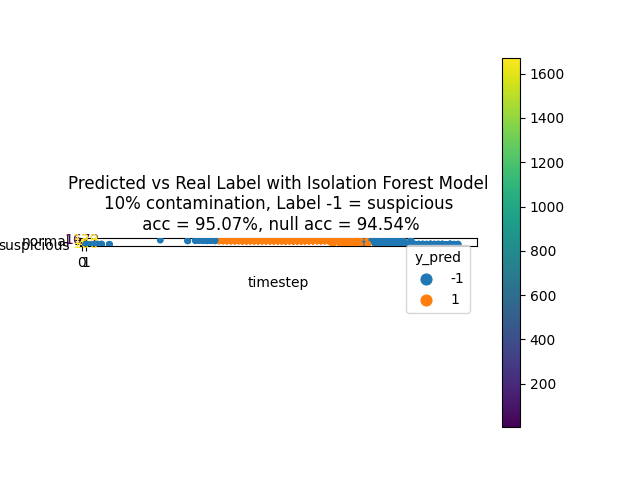

In [ ]:
from sklearn.ensemble import IsolationForest
np.random.seed(123)
clf = IsolationForest(random_state=0, contamination=0.1).fit(Xdeg2)
y_pred = clf.predict(Xdeg2)
#y_pred = IsolationForest(random_state=0, contamination=0.1).fit_predict(X)

txns['y_pred'] = y_pred
null_acc = accuracy_score(txns.y_true, np.zeros(txns.y_true.shape[0])) # ytrue, ypred # predict all 0s (majority class)
null_acc = accuracy_score(txns.y_true, np.zeros(txns.y_true.shape[0])) # ytrue, ypred # predict all 0s (majority class)
acc = accuracy_score(txns.y_true, txns.y_pred==-1 )  # outlier is -1, wjhich is 1 in the other labeling
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )
plt.title(f'Predicted vs Real Label with Isolation Forest Model\n10% contamination, Label -1 = suspicious\n acc = {acc*100:.2f}%, null acc = {null_acc*100:.2f}%')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
np.sum(np.abs(txns.y_true - (txns.y_pred==-1)))

94

In [ ]:
txns
txns.y_true - np.zeros(txns.y_true.shape[0]) # ytrue, ypred # predict all 0s (majority class)
confusion = confusion_matrix(txns.y_true, np.zeros(txns.shape[0]))
tn, fp, fn, tp = confusion.flatten()
acc = (tp + tn) / (tp + tn + fp + fn)
print(acc)
confusion

0.9454068241469816


array([[1801,    0],
       [ 104,    0]])

In [ ]:
confusion = confusion_matrix(txns.y_true, txns.y_pred==-1)
tn, fp, fn, tp = confusion.flatten() 
acc = (tp + tn) / (tp + tn + fp + fn)
print(acc)
confusion

0.9506561679790027


array([[1716,   85],
       [   9,   95]])

In [ ]:
#print('[ isolation pred ]', classification_report(txns.y_true, txns.y_pred==-1))
#print('[ null case ]', classification_report(txns.y_true, np.zeros(txns.shape[0])))

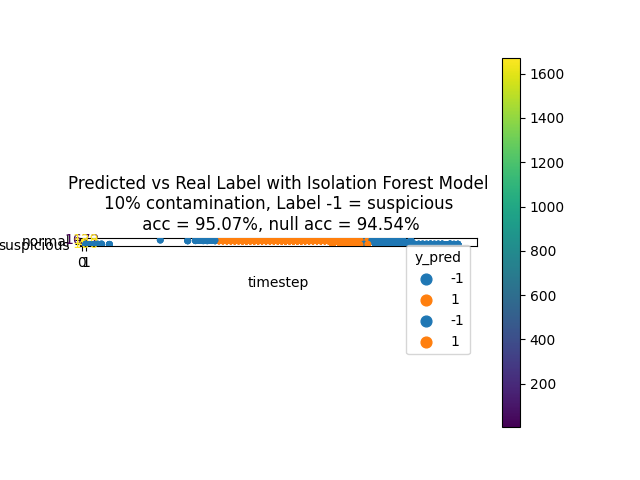

In [ ]:
txns['y_pred'] = y_pred
np.random.seed(123)
null_acc = accuracy_score(txns.y_true, np.zeros(txns.y_true.shape[0])) # ytrue, ypred # predict all 0s (majority class)
acc = accuracy_score(txns.y_true, txns.y_pred==-1 )  # outlier is -1, wjhich is 1 in the other labeling
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )
plt.title(f'Predicted vs Real Label with Isolation Forest Model\n10% contamination, Label -1 = suspicious\n acc = {acc*100:.2f}%, null acc = {null_acc*100:.2f}%')
plt.show()

In [ ]:
Xr = X.reshape(-1,1)
Xr

array([[38],
       [54],
       [47],
       ...,
       [91],
       [92],
       [95]])

In [ ]:
# map[ 0,1 to 1, -1 
y_true = txns.y_true * -2 + 1

In [ ]:
Xdeg2[:,0].shape

(1905,)

In [ ]:
y_true

0       1
1       1
2       1
3       1
4       1
       ..
1900   -1
1901   -1
1902   -1
1903   -1
1904   -1
Name: y_true, Length: 1905, dtype: int64

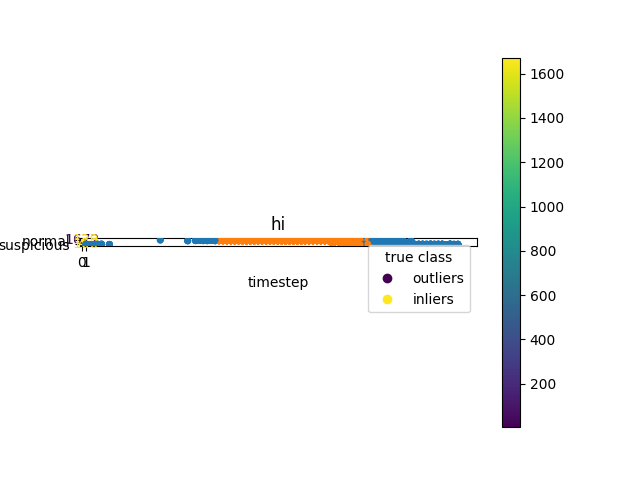

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

scatter = plt.scatter(Xdeg2[:, 0], Xdeg2[:, 1], c=y_true, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title('hi')
plt.show()

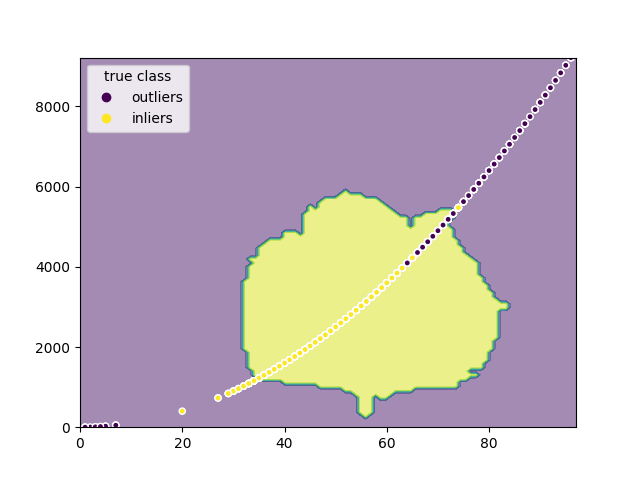

In [ ]:
# The background color represents whether a sample in that given area is predicted to be an outlier or not. The scatter plot displays the true labels.
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    Xdeg2,
    response_method="predict",
    alpha=0.5,
)

disp.ax_.scatter(Xdeg2[:, 0], Xdeg2[:, 1], c=y_true, s=20, edgecolor="w")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
#disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
#plt.axis("square")
plt.show()


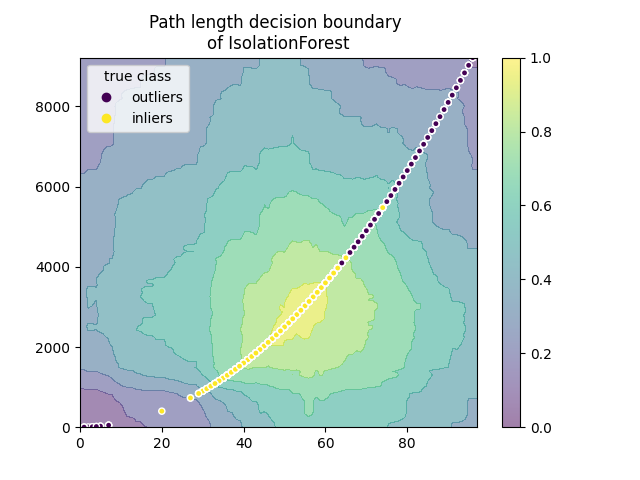

In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html

# Plot path length decision boundary¶
# y setting the response_method="decision_function", the background of the DecisionBoundaryDisplay represents the measure of normality of an observation.
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    Xdeg2,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(Xdeg2[:, 0], Xdeg2[:, 1], c=y_true, s=20, edgecolor="w")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          -1       0.53      0.91      0.67       104
           1       0.99      0.95      0.97      1801

    accuracy                           0.95      1905
   macro avg       0.76      0.93      0.82      1905
weighted avg       0.97      0.95      0.96      1905



In [ ]:
LogisticRegression

NameError: name 'LogisticRegression' is not defined

# classify using in/out degree features

In [ ]:
# varying: small amounts late at night. uhm. other variations between sender / receiver
edges = pd.read_csv('nx_edges_list.csv')

In [ ]:
edges

,nx_node_A,nx_node_B
0,1,664
1,1,477
2,1,60
3,2,930
4,2,638
...,...,...
3953,1009,143
3954,1009,1004
3955,1009,1001
3956,1009,1004


In [ ]:
node_degs = pd.read_csv('tabular_graph_features.csv')

In [ ]:
node_degs

,node_id,in_degree,out_degree
0,1,2,2
1,176,1,2
2,86,1,1
3,2,1,1
4,688,2,3
...,...,...,...
1004,961,0,1
1005,976,0,1
1006,979,0,1
1007,980,0,1


# convert to by_id vs by_txns

In [ ]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,38,2022-10-31 09:30:00,1,176,normal,-5275.417643,2022-10-31 09:30:00,1,0
1,54,2022-10-31 13:30:00,1,86,normal,-5130.963272,2022-10-31 13:30:00,1,0
2,47,2022-10-31 11:45:00,2,688,normal,-7029.970881,2022-10-31 11:45:00,1,0
3,65,2022-10-31 16:15:00,3,633,normal,-2633.337917,2022-10-31 16:15:00,1,0
4,67,2022-10-31 16:45:00,3,262,normal,-4937.723183,2022-10-31 16:45:00,1,0
...,...,...,...,...,...,...,...,...,...
1900,78,2022-10-31 19:30:00,1010,854,suspicious,-768.147863,2022-10-31 19:30:00,-1,1
1901,90,2022-10-31 22:30:00,1010,1001,suspicious,-1000.582847,2022-10-31 22:30:00,-1,1
1902,91,2022-10-31 22:45:00,1010,17,suspicious,-854.625186,2022-10-31 22:45:00,-1,1
1903,92,2022-10-31 23:00:00,1010,1003,suspicious,-934.641919,2022-10-31 23:00:00,-1,1


In [ ]:
true_agent_labels = pd.read_csv('agents_list.csv')
true_agent_labels.columns=['sender_id', 'true_sender_type']
true_agent_labels

,sender_id,true_sender_type
0,1,normal
1,2,normal
2,3,normal
3,4,normal
4,5,normal
...,...,...
990,1006,suspicious
991,1007,suspicious
992,1008,suspicious
993,1009,suspicious


In [ ]:
txns.groupby(['sender_id'])[['sender_id', 'timestep', 'y_pred', 'y_true']].value_counts()

txns_by_id = txns[['sender_id' , 'timestep', 'y_pred', 'y_true']]
txns_by_id = txns_by_id.pivot(index='sender_id', columns='timestep', values='y_true')
txns_by_id

txns_by_id['sum'] = txns_by_id.sum()
txns_by_id.reset_index()[['sender_id', 'sum']].fillna(0) 
txns_by_id['agent_label'] = txns_by_id['sum'] >= 1
pred_by_agent = txns_by_id[['agent_label']] * 1 

In [ ]:
true_agent_labels

,sender_id,true_sender_type
0,1,normal
1,2,normal
2,3,normal
3,4,normal
4,5,normal
...,...,...
990,1006,suspicious
991,1007,suspicious
992,1008,suspicious
993,1009,suspicious


In [ ]:
true_agent_labels['true_label'] = true_agent_labels['true_sender_type'] != 'normal'  
# note that 0 = normal
true_agent_labels['true_label'] *= 1
true_agent_labels

,sender_id,true_sender_type,true_label
0,1,normal,0
1,2,normal,0
2,3,normal,0
3,4,normal,0
4,5,normal,0
...,...,...,...
990,1006,suspicious,1
991,1007,suspicious,1
992,1008,suspicious,1
993,1009,suspicious,1


# error analysis per agent

In [ ]:
errors = pred_by_agent.reset_index().merge(true_agent_labels) 
errors['wrong_pred'] = errors.agent_label == errors.true_label
errors.wrong_pred.sum() / errors.shape[0]

0.9537688442211055

In [ ]:
txns_by_id.sum() != 0

timestep
1              True
2              True
3              True
4              True
5              True
               ... 
94             True
95             True
96             True
sum            True
agent_label    True
Length: 78, dtype: bool

In [ ]:
txns[txns.sender_id == 5]
txns.sender_id.unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   21,   22,   23,
         24,   25,   26,   27,   28,   29,   30,   31,   32,   33,   34,
         35,   36,   37,   38,   39,   40,   41,   42,   43,   44,   45,
         46,   47,   48,   49,   50,   51,   52,   53,   54,   55,   56,
         57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   67,
         68,   69,   70,   71,   72,   73,   74,   75,   76,   77,   78,
         79,   80,   81,   82,   83,   85,   86,   87,   88,   89,   90,
         91,   92,   93,   94,   95,   96,   97,   98,   99,  100,  101,
        103,  104,  105,  106,  107,  108,  109,  110,  111,  112,  113,
        114,  115,  116,  117,  118,  119,  120,  121,  122,  123,  124,
        125,  126,  127,  128,  129,  130,  131,  132,  133,  134,  135,
        136,  137,  138,  139,  140,  141,  142,  143,  144,  145,  146,
        147,  148,  149,  150,  151,  152,  153,  1

In [ ]:
sender_info = pd.DataFrame(txns.sender_id.unique(), columns=['sender_id'])
sender_info

,sender_id
0,1
1,2
2,3
3,4
4,5
...,...
990,1006
991,1007
992,1008
993,1009


In [ ]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,38,2022-10-31 09:30:00,1,176,normal,-5275.417643,2022-10-31 09:30:00,1,0
1,54,2022-10-31 13:30:00,1,86,normal,-5130.963272,2022-10-31 13:30:00,1,0
2,47,2022-10-31 11:45:00,2,688,normal,-7029.970881,2022-10-31 11:45:00,1,0
3,65,2022-10-31 16:15:00,3,633,normal,-2633.337917,2022-10-31 16:15:00,1,0
4,67,2022-10-31 16:45:00,3,262,normal,-4937.723183,2022-10-31 16:45:00,1,0
...,...,...,...,...,...,...,...,...,...
1900,78,2022-10-31 19:30:00,1010,854,suspicious,-768.147863,2022-10-31 19:30:00,-1,1
1901,90,2022-10-31 22:30:00,1010,1001,suspicious,-1000.582847,2022-10-31 22:30:00,-1,1
1902,91,2022-10-31 22:45:00,1010,17,suspicious,-854.625186,2022-10-31 22:45:00,-1,1
1903,92,2022-10-31 23:00:00,1010,1003,suspicious,-934.641919,2022-10-31 23:00:00,-1,1


# try to extract timesteps again; just do loop 

In [ ]:
sender_info['txns'] = None
sender_info['txn_mean_time'] = None
# convert datatype to numpy array
sender_info.txns = sender_info.txns.astype(object)
display(sender_info.sample())

all_my_txns = []
#for id in [1,2]:
for id in sender_info.sender_id:
    my_txns = txns[txns.sender_id == id].timestep
    #print(my_txns.to_list())
    all_my_txns.append(my_txns.to_list())
sender_info['txns'] = pd.Series(all_my_txns)
display(sender_info.iloc[1])
sender_info['txn_mean_time'] = sender_info['txns'].apply(np.mean)
#sender_info['label_by_mean_txn_time'] = 
sender_info


,sender_id,txns,txn_mean_time
617,628,None,None


sender_id           2
txns             [47]
txn_mean_time    None
Name: 1, dtype: object

,sender_id,txns,txn_mean_time
0,1,"[38, 54]",46.000000
1,2,[47],47.000000
2,3,"[65, 67]",66.000000
3,4,[45],45.000000
4,5,[52],52.000000
...,...,...,...
990,1006,"[1, 68, 75, 77, 82, 83, 93, 94]",71.625000
991,1007,"[5, 75, 80, 83, 86, 87, 88, 89, 91]",76.000000
992,1008,"[5, 81, 84, 86, 87, 90, 91, 92, 93, 94]",80.300000
993,1009,"[1, 4, 71, 75, 78, 79, 81, 84, 87, 90, 93, 94,...",71.769231


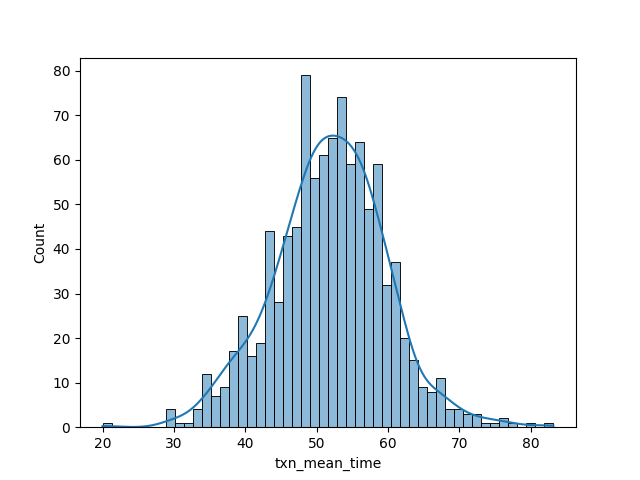

In [ ]:
fig, ax = plt.subplots()
plt.set_xlim = [0,100]
sns.histplot(sender_info['txn_mean_time'], ax=ax, kde=True , bins=50)
#sns.kdeplot(sender_info['txn_mean_time'], ax=ax)
plt.show()

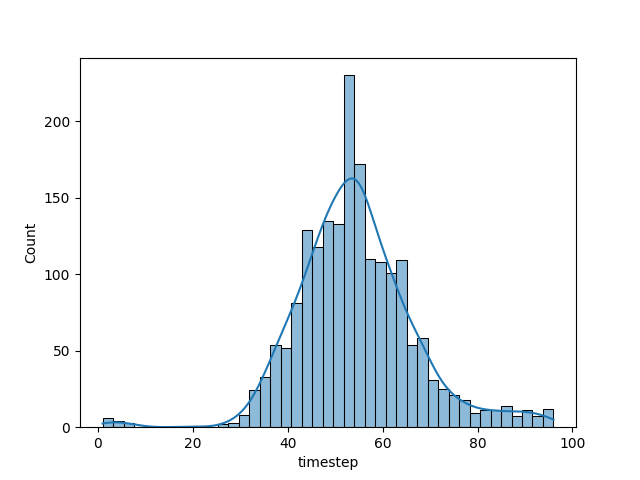

In [ ]:
plt.subplots()
plt.xlim = [0,100]
sns.histplot(txns.timestep, kde=True)
plt.show()

In [ ]:
true_agent_labels.sample()

,sender_id,true_sender_type,true_label
290,297,normal,0


In [ ]:
sender_info = sender_info.merge(true_agent_labels)

In [ ]:
sns.stripplot(sender_info['txn_mean_time'],)#, type=)
sns.histplot(sender_info['txn_mean_time'])#, type=)

/Users/owls/v3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='txn_mean_time', ylabel='Count'>

In [ ]:
sender_info

,sender_id,txns,txn_mean_time,true_sender_type,true_label
0,1,"[38, 54]",46.000000,normal,0
1,2,[47],47.000000,normal,0
2,3,"[65, 67]",66.000000,normal,0
3,4,[45],45.000000,normal,0
4,5,[52],52.000000,normal,0
...,...,...,...,...,...
990,1006,"[1, 68, 75, 77, 82, 83, 93, 94]",71.625000,suspicious,1
991,1007,"[5, 75, 80, 83, 86, 87, 88, 89, 91]",76.000000,suspicious,1
992,1008,"[5, 81, 84, 86, 87, 90, 91, 92, 93, 94]",80.300000,suspicious,1
993,1009,"[1, 4, 71, 75, 78, 79, 81, 84, 87, 90, 93, 94,...",71.769231,suspicious,1


# plot with true hue 

In [ ]:
sns.histplot(data=sender_info, x='txn_mean_time', hue='true_sender_type')

<AxesSubplot:xlabel='txn_mean_time', ylabel='Count'>

# create in / out degree table

In [ ]:
node_degs.columns=['sender_id', 'in_degree', 'out_degree']
node_degs

NameError: name 'node_degs' is not defined

In [ ]:
sender_info = sender_info.merge(node_degs)
sender_info

NameError: name 'node_degs' is not defined

# kmeans  / isolation forest classification

In [ ]:
sender_info['y_pred_type'] = sender_info.y_pred.apply(lambda x: 'normal' if x == 1 else 'suspicious')
sender_info

AttributeError: 'DataFrame' object has no attribute 'y_pred'

In [ ]:
X = sender_info[['txn_mean_time' , 'in_degree', 'out_degree']]
# DEFINITELY don't leave sender id in there

#y_pred = KMeans(
        #n_clusters=2
    #).fit_predict(X)
#
np.random.seed(123)
y_pred = IsolationForest(random_state=0, contamination=0.1).fit_predict(X)
sender_info['y_pred'] = y_pred
colors = ['r' if label==0 else 'b' for label in y_pred]
#-- plot disaggregated by prediction (vs true) 
#plt.subplots()
#sns.stripplot(data=sender_info, x='txn_mean_time', 
#    y='y_pred_type', hue='true_sender_type', )

#-- plot disaggregated by true label 
plt.subplots()
sns.stripplot(data=sender_info, x='txn_mean_time', y='true_sender_type', hue='y_pred_type', )
plt.title('Predicted vs Real Label with Isolation Forest\n Including In/Out degree features')

plt.show()

KeyError: "['in_degree', 'out_degree'] not in index"

In [ ]:
sender_info[sender_info.true_label == 1][['out_degree']].value_counts()
sender_info[sender_info.true_label == 0][['out_degree']].value_counts()
#sender_info[sender_info.true_label == 1].in_degree.value_counts()

In [ ]:
sns.pairplot(sender_info[['txn_mean_time', 'in_degree', 'out_degree']])

In [ ]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,38,2022-10-31 09:30:00,1,176,normal,-5275.417643,2022-10-31 09:30:00,1,0
1,54,2022-10-31 13:30:00,1,86,normal,-5130.963272,2022-10-31 13:30:00,1,0
2,47,2022-10-31 11:45:00,2,688,normal,-7029.970881,2022-10-31 11:45:00,1,0
3,65,2022-10-31 16:15:00,3,633,normal,-2633.337917,2022-10-31 16:15:00,1,0
4,67,2022-10-31 16:45:00,3,262,normal,-4937.723183,2022-10-31 16:45:00,1,0
...,...,...,...,...,...,...,...,...,...
1900,78,2022-10-31 19:30:00,1010,854,suspicious,-768.147863,2022-10-31 19:30:00,-1,1
1901,90,2022-10-31 22:30:00,1010,1001,suspicious,-1000.582847,2022-10-31 22:30:00,-1,1
1902,91,2022-10-31 22:45:00,1010,17,suspicious,-854.625186,2022-10-31 22:45:00,-1,1
1903,92,2022-10-31 23:00:00,1010,1003,suspicious,-934.641919,2022-10-31 23:00:00,-1,1


In [ ]:
txns[(txns.sender_id == 1)].timestep.mean()

46.0

In [ ]:
sender_info.txn_mean_time

0      46.000000
1      47.000000
2      66.000000
3      45.000000
4      52.000000
         ...    
990    71.625000
991    76.000000
992    80.300000
993    71.769231
994    74.000000
Name: txn_mean_time, Length: 995, dtype: float64

# test same distribution with Kolmogorov-Smirnov test

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(sender_info.txn_mean_time, sender_info.txn_mean_time)

KstestResult(statistic=0.0, pvalue=1.0)

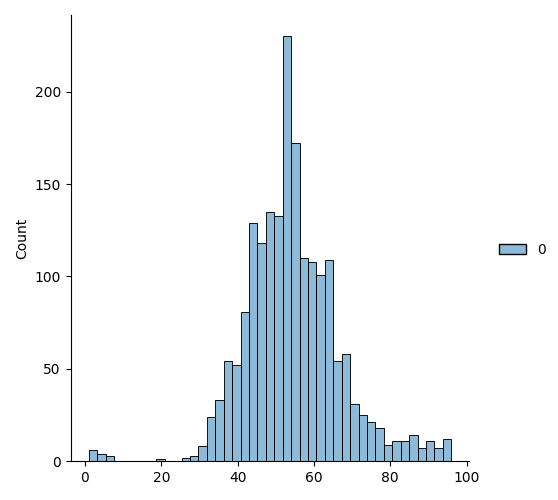

In [ ]:
from sklearn import preprocessing 

sns.histplot(preprocessing.normalize(
    txns.timestep.to_numpy().reshape(-1,1)
    ))
sns.displot(txns.timestep.to_numpy().reshape(-1,1))

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(
    preprocessing.normalize(
        sender_info.txn_mean_time.to_numpy().reshape(-1,1),
    ),
    preprocessing.normalize(
        txns.timestep.to_numpy().reshape(-1,1)
        )
    )
# Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the two sample datasets do not come from the same distribution.

ValueError: object too deep for desired array

# decision tree

In [ ]:
X[:,0]

array([38, 54, 47, ..., 91, 92, 95])

In [ ]:
agent_based_model.Utility.timestep_to_time(77.5)

AttributeError: 'datetime.datetime' object has no attribute 'printf'

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, txns.y_true)

NameError: name 'tree' is not defined

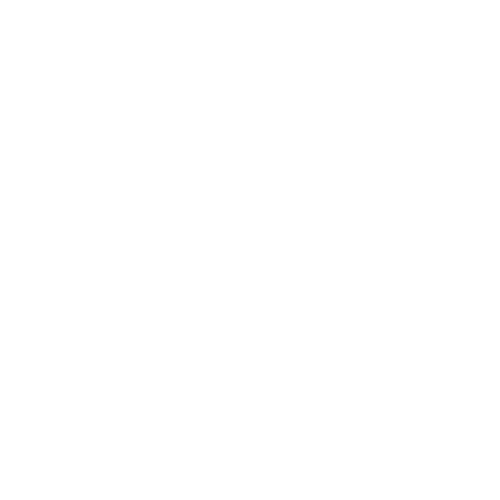

In [ ]:
plt.figure(figsize=(5,5))
tree.plot_tree(clf)
plt.show()